In [1]:
import matplotlib
# matplotlib.use('agg')
import numpy as np
import pandas as pd
import pickle
import gzip
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as datetime
from random import shuffle
import math
import matplotlib.gridspec as gridspec
%matplotlib notebook


In [14]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5 
fig_height = 2.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [4]:
fluxfile = '/shared/users/asousa/WIPP/Thesis figures/data/AE8MAX_integral_flux_64_energies_8.dat'
d = os.listdir('/shared/users/asousa/WIPP/Thesis figures/data')

Jdata_max = np.loadtxt(fluxfile)

JL = Jdata_max[1:,0]  # L-shells in J-file
JE = Jdata_max[0,1:]  # Energies in J-file
print "J is: ", np.shape(Jdata_max)
print JL  
print JE 

fluxfile = '/shared/users/asousa/WIPP/Thesis figures/data/AE8MIN_integral_flux_64_energies_8.dat'

Jdata_min = np.loadtxt(fluxfile)


# print (pyparams['E_tot_arr'] - JE[0]*1e6) > 0)

 J is:  (81, 65)
[ 1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6
  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1
  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6
  8.7  8.8  8.9  9.   9.1]
[ 0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.16
  0.17  0.18  0.2   0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.36  0.39
  0.42  0.45  0.49  0.52  0.57  0.61  0.66  0.71  0.77  0.83  0.89  0.96
  1.04  1.12  1.21  1.3   1.4   1.51  1.63  1.76  1.9   2.05  2.21  2.38
  2.57  2.77  2.99  3.23  3.48  3.75  4.05  4.37  4.71  5.08  5.48  5.91
  6.37  6.88  7.42  8.  ]


In [ ]:
fig = plt.figure()
gs = gridspec.GridSpec(2,2,width_ratios=[1,0.05])
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
cax = plt.subplot(gs[:,1])
cmap = plt.cm.jet
clims = [2, 9]

ax.pcolormesh(JL_interp, JE_interp, interp_2d(Jdata_max[1:,1:]))

maxdata = np.log10(Jdata_max[1:,1:]).T
maxdata_interp = np.log10(interp_2d(Jdata_max[1:,1:])).T
p0 = ax0.pcolormesh(JL, JE*1e3, maxdata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')

ax0.set_yscale('log')

mindata = np.log10(Jdata_min[1:,1:]).T
p1 = ax1.pcolormesh(JL, JE*1e3, mindata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')


ax0.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ytix = np.array([100,200, 500, 1000,2000, 5000])
# yticklabels = ['100kev','500kev','1Mev','5Mev']
ax0.set_yticks(ytix)


ax1.set_yscale('log')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yticks(ytix)
ax1.set_xlabel('L-shell')
ax0.set_xticklabels([])
ax0.set_ylabel('Max conditions\nEnergy [kev]')
ax1.set_ylabel('Min conditions\nEnergy [kev]')

cb = plt.colorbar(p0, cax=cax)
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
cb.set_label('$\Delta \\alpha_{RMS}$ (deg)')
cb.set_label('Integral Electron Flux [#/cm$^2$/sec]')


# Here is the label and arrow code of interest
ax0.annotate('Inner Belt', xy=(0.1, 1.10), xytext=(0.1, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=3.0, lengthB=0.5', lw=1.5))

# Here is the label and arrow code of interest
ax0.annotate('Outer Belt', xy=(0.6, 1.10), xytext=(0.6, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=8.0, lengthB=0.5', lw=1.5))

# Here is the label and arrow code of interest
ax0.annotate('Slot', xy=(0.275, 1.10), xytext=(0.275, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=0.5', lw=1.5))



# gs.tight_layout(fig)


fig.subplots_adjust(top=0.88, bottom=0.15, right=0.88)
fig.savefig('AE8_fluxes.pdf')



# (if you wanted to plot differential flux instead!)
# # Normalization term: such that integrating from alpha_lc to Pi/2 --> 1
# normterm = per - per*np.cos((np.pi - 2.*offset)/2./per)
# pa_dist = pa_dist/normterm

<IPython.core.display.Javascript object>


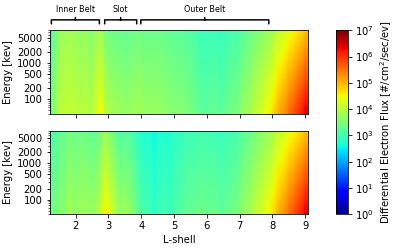

In [172]:
jdiff_max = np.zeros_like(Jdata_max[1:,1:])
jdiff_min = np.zeros_like(Jdata_max[1:,1:])

# Get equatorial loss cone angle for this L-shell:
def get_loss_cone(Lsh):
    epsm = (1/Lsh)*(R_E+H_IONO_BOTTOM)/R_E;
    crunch  = np.sqrt(1+3*(1-epsm))/pow(epsm,3); 
    alpha_eq  = np.arcsin(np.sqrt( 1.0/crunch ));
    return alpha_eq



for E_ind, E_in in enumerate(JE):
    for L_ind, L in enumerate(JL):
        alpha_lc = get_loss_cone(L)
#         # Energy differential of AE8 model
        jdiff_max[L_ind, E_ind]=get_Jdiff(Jdata_max, np.shape(Jdata_max)[0], np.shape(Jdata_max)[1], E_in, alpha_lc, L)        
        jdiff_min[L_ind, E_ind]=get_Jdiff(Jdata_min, np.shape(Jdata_min)[0], np.shape(Jdata_min)[1], E_in, alpha_lc, L)        
        
fig = plt.figure()
gs = gridspec.GridSpec(2,2,width_ratios=[1,0.05])
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
cax = plt.subplot(gs[:,1])
cmap = plt.cm.jet
clims = [0, 7]

maxdata = np.log10(jdiff_max).T
p0 = ax0.pcolormesh(JL, JE*1e3, maxdata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')

ax0.set_yscale('log')

mindata = np.log10(jdiff_min).T
p1 = ax1.pcolormesh(JL, JE*1e3, mindata, vmin=clims[0], vmax=clims[1], cmap = cmap, shading='gouraud')


ax0.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ytix = np.array([100,200, 500, 1000,2000, 5000])
# yticklabels = ['100kev','500kev','1Mev','5Mev']
ax0.set_yticks(ytix)


ax1.set_yscale('log')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yticks(ytix)
ax1.set_xlabel('L-shell')
ax0.set_xticklabels([])
ax0.set_ylabel('Max conditions\nEnergy [kev]')
ax1.set_ylabel('Min conditions\nEnergy [kev]')

cb = plt.colorbar(p0, cax=cax)
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
cb.set_label('$\Delta \\alpha_{RMS}$ (deg)')
cb.set_label('Differential Electron Flux [#/cm$^2$/sec/ev]')


# Here is the label and arrow code of interest
ax0.annotate('Inner Belt', xy=(0.1, 1.10), xytext=(0.1, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=3.0, lengthB=0.5', lw=1.5))

# Here is the label and arrow code of interest
ax0.annotate('Outer Belt', xy=(0.6, 1.10), xytext=(0.6, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=8.0, lengthB=0.5', lw=1.5))

# Here is the label and arrow code of interest
ax0.annotate('Slot', xy=(0.275, 1.10), xytext=(0.275, 1.20), xycoords='axes fraction', 
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=0.5', lw=1.5))



# gs.tight_layout(fig)


fig.subplots_adjust(top=0.88, bottom=0.15, right=0.88)
fig.savefig('AE8_fluxes_differential.pdf')



# (if you wanted to plot differential flux instead!)
# # Normalization term: such that integrating from alpha_lc to Pi/2 --> 1
# normterm = per - per*np.cos((np.pi - 2.*offset)/2./per)
# pa_dist = pa_dist/normterm

In [157]:
## Plot pitch-angle distribution function

In [159]:
import ctypes as ct
from numpy.ctypeslib import ndpointer

# -------------- set up C module ------------------------
lib_path ='/shared/users/asousa/WIPP/WIPP_stencils/c/libwipp.so'
ct.cdll.LoadLibrary(lib_path)
lib = ct.CDLL(lib_path)

get_Jdiff = lib.getJdiff_no_I
get_Jdiff.restype = ct.c_double

# double  getJdiff(double *Jp, int n_JL, int n_JE, double E, double alpha_lc, double L_sh)
get_Jdiff.argtypes =  [ndpointer(ct.c_double,flags='C_CONTIGUOUS'),
                       ct.c_int, ct.c_int, ct.c_double, ct.c_double, ct.c_double]

<IPython.core.display.Javascript object>


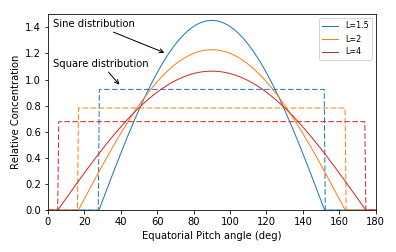

28.0603835663
190.35088519 190.555435427
16.768064599
190.348649976 190.902645473
5.4734637453
190.348322004 189.796234112


In [243]:
R_E = 6371. # Km
R2D = 180./np.pi
D2R = np.pi/180.
Hz2Rad = 2.*np.pi
D2R = np.pi/180.
H_IONO_BOTTOM = 1e5
H_IONO_TOP = 1e6
R_E = 6371e3
M_EL = 9.1e-31
E_EL = 5.105396765648739E5 
MU0  = np.pi*4e-7
EPS0 = 8.854E-12
C    = 2.997956376932163e8

# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5 
fig_height = 2.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
L_vec = [1.5, 2, 4]

E_vec = pow(10, np.arange(1, 8, 0.1) );

alpha_vec = np.linspace(0, np.pi, 300)
# L_sh = 1.5

# Get equatorial loss cone angle for this L-shell:
def get_loss_cone(Lsh):
    epsm = (1./Lsh)*(R_E+H_IONO_BOTTOM)/R_E;
    crunch  = np.sqrt(1.+3.*(1.-epsm))/pow(epsm,3.); 
    alpha_eq  = np.arcsin(np.sqrt( 1.0/crunch ));
    return alpha_eq


colors = [plt.cm.Vega10(0), plt.cm.Vega10(1), plt.cm.Vega10(3)]
fig, ax = plt.subplots(1,1)

for L_ind, L_sh in enumerate(L_vec):
    # Pitch-angle distribution (per L-shell)
    alpha_lc = get_loss_cone(L_sh)
    print alpha_lc*R2D
    per = (np.pi - 2.*alpha_lc)/np.pi
    offset = alpha_lc
    pa_dist = np.sin((alpha_vec - offset)/per)
    pa_dist[alpha_vec < alpha_lc] = 0
    pa_dist[alpha_vec > (np.pi - alpha_lc)] = 0
    normterm = per - per*np.cos((np.pi - 2.*offset)/2./per)
    pa_dist = pa_dist/normterm
    
    
    # square distribution:
    normterm_square = (np.pi - 2.*alpha_lc)/2.
    pa_dist_square = np.ones_like(pa_dist)/normterm_square
    pa_dist_square[alpha_vec < alpha_lc] = 0
    pa_dist_square[alpha_vec > (np.pi - alpha_lc)] = 0
    
    
    print np.sum(pa_dist), np.sum(pa_dist_square)


    ax.plot(alpha_vec*R2D, pa_dist, color=colors[L_ind], linewidth=1, label='L=%g'%L_sh)
    ax.plot(alpha_vec*R2D, pa_dist_square,'--', color=colors[L_ind], linewidth=1)
    
ax.annotate("Sine distribution", xy=(65, 1.2), xytext=(3, 1.4),
    arrowprops=dict(arrowstyle="->"))

ax.annotate("Square distribution", xy=(40, 0.95), xytext=(3, 1.1),
    arrowprops=dict(arrowstyle="->"))
ax.set_xlabel('Equatorial Pitch angle (deg)')
ax.set_ylabel('Relative Concentration')
ax.legend()
ax.set_ylim([0,1.5])
ax.set_xlim([0,180])

fig.tight_layout()
fig.savefig('Pitch-angle_distributions.pdf')